<a href="https://colab.research.google.com/github/ssgupta201301/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [0]:
#inspecting the head
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
pd.set_option('display.max_rows', 100)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
df[['BedroomAbvGr', 'Fireplaces']].head(1)

,BedroomAbvGr,Fireplaces
0,3,0


In [0]:
# Look at the first ten rows of the `BedroomAbvGr` column.
df['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [0]:
df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
# NaN is the most common value in this column. What is a NaN
import numpy as np
type(np.nan)

float

In [0]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
small_df = df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [0]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset

# Using bracket syntax to make a new 'TotalSquareFootage' column
small_df['TotalSquareFootage'] = small_df['TotalBsmtSF']+small_df['1stFlrSF']+small_df['2ndFlrSF']
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [0]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small_df['PricePerSqFt']= small_df['SalePrice'] / small_df['TotalSquareFootage']
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [0]:
#Second dataset
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-01-18 03:51:29--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [    <=>             ]  21.72M  1.52MB/s    in 14s     

2020-01-18 03:51:44 (1.50 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22776791]



In [0]:
#Unzip the file
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


# New Section

In [0]:
#during the stretch goals made some mistake and had to run all the cells again, 
#at that time  had problem unzipping the file again so had to upload the from 
#colab, later could fix the unzipping problem but still kept the following cell
 

In [0]:
#importing files from google colab
# choose file through the prompt
# upload the file. Wait for the file to be 100% uploaded

from google.colab import files
uploaded = files.upload()

Saving LoanStats_2018Q4.csv.zip to LoanStats_2018Q4.csv (1).zip


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title           emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt     total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       6000      6000        6000             36 months  14.47%  206.44      C     C2        Manager             10+ years  RENT           55000      Verified            Dec-2018 Charged Off n          NaN NaN  credit_card        Credit card refinancing 104xx    NY         10.65 0           Jun-2006         0              NaN                    NaN                    6        0       4196      91.2%      8         w                   0.00      0.00          1106.52         1106.52         546.14          272.38        0.0                288.0      51.84                   Apr-2019     206.44          NaN          Nov-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            12514       0           2           1           1           9                  8318         74      1           1           2807       79       4600             1      0           2            2                    2086        344            92      0                        0           33                 150                  9                     9              0        9                    NaN                      9                     NaN                            0                     3              4               3           3         3         4             5             4                   6        0                0            0                  2                  100            100        

In [0]:
#checking the shape
df.shape

(128400, 1)

In [0]:
#fixing the df by adding skiprows parameter
# inspecting the head
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)

print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(128399, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000.0,6000.0,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0.0,Jun-2006,0.0,NaN,NaN,6.0,0.0,4196.0,91.2%,8.0,w,0.00,0.00,1106.520000,1106.52,...,100.0,0.0,0.0,15800.0,12514.0,4300.0,11200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000.0,24000.0,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0.0,Oct-1996,3.0,39.0,NaN,14.0,0.0,8547.0,27.7%,28.0,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0.0,0.0,335121.0,50686.0,25900.0,61514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000.0,30000.0,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0.0,May-2007,1.0,NaN,NaN,8.0,0.0,25754.0,48%,23.0,w,0.00,0.00,30883.673712,30883.67,...,50.0,0.0,0.0,89849.0,51370.0,41600.0,36249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000.0,8000.0,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0.0,Mar-2009,2.0,73.0,NaN,7.0,0.0,11434.0,33.3%,20.0,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0.0,0.0,271550.0,25150.0,34300.0,14000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400.0,22400.0,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0.0,Dec-2004,0.0,75.0,NaN,15.0,0.0,13555.0,38.2%,22.0,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0.0,0.0,253539.0,32070.0,28200.0,23364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
### Sum null values by column and sort from least to greatest
df.isnull().sum().sort_values()

inq_fi                                             2
delinq_amnt                                        2
chargeoff_within_12_mths                           2
acc_open_past_24mths                               2
inq_last_12m                                       2
                                               ...  
orig_projected_additional_accrued_interest    128193
id                                            128397
url                                           128399
member_id                                     128399
desc                                          128399
Length: 144, dtype: int64

In [0]:
### Address the extra NaNs in each column by skipping the footer as well.
df = pd.read_csv('LoanStats_2018Q4.csv', 
                 skiprows=1, 
                 skipfooter=2, 
                 engine='python')

print(df.shape)
df.head()

(128397, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
                                               ...  
orig_projected_additional_accrued_interest    128191
url                                           128397
member_id                                     128397
desc                                          128397
id                                            128397
Length: 144, dtype: int64

In [0]:
df = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

print(df.shape)
df.head()

(128397, 140)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
### Look at the first 10 values of the int_rate column
df['int_rate'][:10]

0     14.47%
1     10.33%
2     15.02%
3     12.98%
4     16.14%
5     12.98%
6     15.02%
7     16.14%
8     14.47%
9     13.56%
Name: int_rate, dtype: object

In [0]:
### Look at a specific value from the int_rate column

df['int_rate'][0]

' 14.47%'

In [0]:
### Lets start with just fixing a single string.
### If we can fix one, we can usually fix all of them
int_rate = ' 14.17%'
int_rate.strip()

'14.17%'

In [0]:
int_rate.strip('%')

' 14.17'

In [0]:
type(int_rate.strip().strip('%'))

str

In [0]:
### "Cast" the string value to a float

float(int_rate.strip().strip('%'))

14.17

In [0]:
### Write a function that can do what we have written above to any 
### string that is passsed to it.

def int_rate_to_float(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [0]:
int_rate_to_float(int_rate)

14.17

In [0]:
### is the data type correct?

type(int_rate_to_float(int_rate))

float

In [0]:
#Apply our solution to every cell in a column
df['int_rate_float'] = df['int_rate'].apply(int_rate_to_float)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14


In [0]:
### What type of data is held in our new column?

### Look at the datatypes of the last 5 columns
df.dtypes[-5:]

settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
int_rate_float           float64
dtype: object

In [0]:
### Look at the top 20 employment titles
df['emp_title'].value_counts(dropna=False, ascending=False)[:20]

NaN                   20942
Teacher                2090
Manager                1773
Registered Nurse        951
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
### How many different unique employment titles are there currently?
len(df['emp_title'].value_counts())

43889

In [0]:
### How often is the employment_title null?
df['emp_title'].isnull().sum()

20942

In [0]:
### Create some examples that represent the cases that we want to clean up

examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [0]:
### Write a function to clean up these use cases and increase uniformity.

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"

for example in examples:
  print(clean_title(example))

Owner
Supervisor
Project Manager
Unknown


In [0]:
### list comprehensions can combine function calls and for loops over lists
### into one succinct and fairly readable single line of code.

[clean_title(example) for example in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
### We have a function that works as expected. Lets apply it to our column.
### This time we'll overwrite the original column

df['emp_title'] = df['emp_title'].apply(clean_title)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14


In [0]:
### Look at the top 20 employment titles
df['emp_title'].value_counts(dropna=False, ascending=False)[:20]

Unknown               20942
Teacher                2557
Manager                2395
Registered Nurse       1417
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          804
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   424
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
### How many different unique employment titles are there currently?
len(df['emp_title'].value_counts())

34899

In [0]:
### How often is the employment_title null (NaN)?
df['emp_title'].isnull().sum()

0

In [0]:
#You can access these properties via the .dt accessor”
#Many of the most useful date columns in this dataset have the suffix _d to 
#indicate that they correspond to dates.

#We’ll use a list comprehension to print them out

[col for col in df if col.endswith('_d')]
['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [0]:
#let Pandas detect this format and translate it to the appropriate datetime 
#object.
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

df.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dtype: object

In [0]:
#Lets look at one of the cells specifically to see what a datetime object looks
# like

df['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [0]:
 #the month and year have been indicated by the strings that were contained in
 # the column previously, and that the rest of the values have been inferred.
 
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
#use the .dt accessor to now grab specific parts of the datetime object. 
#Lets grab just the year from the all of the cells in the issue_d column
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128392    2018
128393    2018
128394    2018
128395    2018
128396    2018
Name: issue_d, Length: 128397, dtype: int64

In [0]:
#Now the month
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128392    10
128393    10
128394    10
128395    10
128396    10
Name: issue_d, Length: 128397, dtype: int64

In [0]:
#add these year and month values as new columns on our dataframe
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,issue_year,issue_month
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12


In [0]:
#indicate the length of a person’s credit history and if that is correlated with
# repayment or other factors could be a valuable predictor!
df['earliest_cr_line'].head()

0    Jun-2006
1    Oct-1996
2    May-2007
3    Mar-2009
4    Dec-2004
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
df['days_from_earliest_credit_to_issue'].head()

0    4566
1    8096
2    4232
3    3562
4    5113
Name: days_from_earliest_credit_to_issue, dtype: int64

In [0]:
df['days_from_earliest_credit_to_issue'].describe()

count    128397.000000
mean       5859.918464
std        2886.617678
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [0]:
#Convert the term column from string to integer.
#taking a look at one value from the column
df['term']
df['term'][0]

' 36 months'

In [0]:
term = ' 36 months'

In [0]:
#using strip()
term.strip().strip('months').strip()

'36'

In [0]:
#checking the type
type(term.strip().strip('months').strip())

str

In [0]:
#casting to integer
int(term.strip().strip('months').strip())
 

36

In [0]:
type(int(term.strip().strip('months').strip()))
 

int

In [0]:
def str_int(cell_contents):
  return int(term.strip().strip('months').strip())

In [0]:
str_int(term)

36

In [0]:
df['new_str_int'] = df['term'].apply(str_int)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,issue_year,issue_month,days_from_earliest_credit_to_issue,loan_status_is_great,new_str_int
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,2006-06-01,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,4566,0,36
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,1996-10-01,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,8096,1,36
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,2007-05-01,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,4232,1,36
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,2009-03-01,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,3562,1,36
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,2004-12-01,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,5113,1,36


In [0]:
#Making a column named loan_status_is_great. It should contain the integer 1 if 
#loan_status is "Current" or "Fully Paid." Else it should contain the integer 0
#taking a look at loan_status column
df['loan_status']

0         Charged Off
1             Current
2          Fully Paid
3             Current
4             Current
             ...     
128392    Charged Off
128393        Current
128394        Current
128395        Current
128396        Current
Name: loan_status, Length: 128397, dtype: object

In [0]:
# writing a function to encode loan_status column

examples_1 = ['Charged Off','Current','Fully Paid','Current','Current']
def change_element(element):
  if element=="Current"or element == "Fully Paid":
    return 1
  else: return 0

In [0]:
# Using map() function  to apply above function to each item  of the list
#  to check if the function is working properly
result = map(change_element, examples_1) 
print(list(result)) 


[0, 1, 1, 1, 1]


In [0]:
#Apply our solution to every cell in a column
#creating a new column:loan_status_is_great

df['loan_status_is_great'] = df['loan_status'].apply(change_element)

In [0]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,issue_year,issue_month,days_from_earliest_credit_to_issue,loan_status_is_great
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,2006-06-01,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,4566,0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,1996-10-01,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,8096,1
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,2007-05-01,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,4232,1
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,2009-03-01,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,3562,1
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,2004-12-01,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,5113,1


In [0]:
#Make last_pymnt_d_month and last_pymnt_d_year columns
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# taking a look at last_pymnt_d' column
df['last_pymnt_d']

0         Apr-2019
1         Dec-2019
2         Feb-2019
3         Dec-2019
4         Dec-2019
            ...   
128392    Dec-2018
128393    Dec-2019
128394    Dec-2019
128395    Dec-2019
128396    Dec-2019
Name: last_pymnt_d, Length: 128397, dtype: object

In [0]:
#letting Pandas detect the format and translate it to the appropriate datetime 
#object.

df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], 
                                    infer_datetime_format=True)

In [0]:
#taking a look at the data types
df.dtypes[:20]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dtype: object

In [0]:
# checking the head values
df['last_pymnt_d'].head().values

array(['2019-04-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
#cheking the tail values
df['last_pymnt_d'].tail().values

array(['2018-12-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df['last_pymnt_d'].dt.year

0         2019.0
1         2019.0
2         2019.0
3         2019.0
4         2019.0
           ...  
128392    2018.0
128393    2019.0
128394    2019.0
128395    2019.0
128396    2019.0
Name: last_pymnt_d, Length: 128397, dtype: float64

In [0]:
df['last_pymnt_d'].dt.month

0          4.0
1         12.0
2          2.0
3         12.0
4         12.0
          ... 
128392    12.0
128393    12.0
128394    12.0
128395    12.0
128396    12.0
Name: last_pymnt_d, Length: 128397, dtype: float64

In [0]:
# checking for NAn values
df['last_pymnt_d'].isnull().sum()

159

In [0]:
#creating last_pymnt_d_year,last_pymnt_d_month columns

df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_float,issue_year,issue_month,days_from_earliest_credit_to_issue,loan_status_is_great,new_str_int,last_pymnt_d_year,last_pymnt_d_month
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,2006-06-01,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,4566,0,36,2019.0,4.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,1996-10-01,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,8096,1,36,2019.0,12.0
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,2007-05-01,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,4232,1,36,2019.0,2.0
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,2009-03-01,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,3562,1,36,2019.0,12.0
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,2004-12-01,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,5113,1,36,2019.0,12.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01

In [0]:
#stretch goal 1
#taking a look at revolving util column
df['revol_util'].tail(50)

128347    80.6%
128348    79.7%
128349    54.1%
128350      63%
128351    30.5%
128352      16%
128353    36.3%
128354    85.8%
128355    11.4%
128356       0%
128357     7.5%
128358    76.8%
128359    47.4%
128360    14.1%
128361    65.8%
128362     4.3%
128363    60.2%
128364    66.3%
128365    29.3%
128366     9.9%
128367    56.2%
128368      25%
128369     7.7%
128370    98.9%
128371      84%
128372    36.4%
128373    42.5%
128374    74.6%
128375       0%
128376      58%
128377    25.3%
128378    80.9%
128379     2.8%
128380    47.9%
128381      45%
128382      55%
128383    40.7%
128384    35.8%
128385    87.3%
128386    76.3%
128387    15.7%
128388     5.4%
128389    14.3%
128390    62.2%
128391    34.5%
128392    43.6%
128393    37.1%
128394    27.3%
128395    13.1%
128396    30.8%
Name: revol_util, dtype: object

In [0]:
 #replacing Nan with 0
 df['revol_util'].fillna(0.0, inplace=True)


In [0]:
df['revol_util'].isnull().sum()

0

In [0]:
#cheking the second value 
df['revol_util'][2]

'48%'

In [0]:
revol_util = '48%'
float(revol_util.strip('%'))

48.0

In [0]:
#removing the % sign
def clean_revolve_util(cell_contents):
    return float(str(cell_contents).strip('%'))

In [0]:

df['clean_revolve_util'] = df['revol_util'].apply(clean_revolve_util)


In [0]:
df['clean_revolve_util'].head()

0    91.2
1    27.7
2    48.0
3    33.3
4    38.2
Name: clean_revolve_util, dtype: float64

In [0]:
#Strtch goal 2
#Modify the emp_title column to replace titles with 'Other' if the title is not 
#in the top 20
df['emp_title'].head(20)

0                              Manager
1                  Maintenance Manager
2                          Firefighter
3                           Controller
4              Paramedic/ Fire Fighter
5                           Consultant
6                           Supervisor
7                              Unknown
8                 Warehouse Associates
9              Director Of Reinsurance
10                     Math Instructor
11                  Nursing Supervisor
12                            Security
13                      Administrative
14                    Material Handler
15           Instructional Coordinator
16    Financial Relationship Associate
17                             Unknown
18                 Sale Representative
19                  Driver Coordinator
Name: emp_title, dtype: object

In [0]:
#helplinks:https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql
#https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
#made a pd series for first 20 job titles
#using isin and ~ for notisin to modify emp_title column
jobs = pd.Series(df['emp_title'].head(20), name='employee_title')

df.loc[~df['emp_title'].isin(jobs), 'emp_title'] = 'Other'

df['emp_title'].head(40)



0                              Manager
1                  Maintenance Manager
2                          Firefighter
3                           Controller
4              Paramedic/ Fire Fighter
5                           Consultant
6                           Supervisor
7                              Unknown
8                 Warehouse Associates
9              Director Of Reinsurance
10                     Math Instructor
11                  Nursing Supervisor
12                            Security
13                      Administrative
14                    Material Handler
15           Instructional Coordinator
16    Financial Relationship Associate
17                             Unknown
18                 Sale Representative
19                  Driver Coordinator
20                               Other
21                               Other
22                               Other
23                               Other
24                             Unknown
25                       

In [0]:
#Stretch goal 3
 !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-19 23:28:33--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.232.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.232.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  89.4MB/s    in 2.2s    

2020-01-19 23:28:40 (89.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
#Could not fix this error..tried a lot
#figured will read the files separately i.e one at a time

df1= pd.read_csv('https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz')
#df1 = pd.read_csv(url, error_bad_lines=False)

ParserError: ignored

In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
#User1df finally will have Userid, Uset Item, DAtetime, Datessince prior oredr
#reordered
# Step 1 checking orders data
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# dropping columns order_number,order_dow
userdf = orders.drop(columns=['order_number','order_dow'])

In [0]:
#inspecting userdf
userdf.head()

,order_id,user_id,eval_set,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,8,NaN
1,2398795,1,prior,7,15.0
2,473747,1,prior,12,21.0
3,2254736,1,prior,7,29.0
4,431534,1,prior,15,28.0


In [0]:
#Concacting datas-order_products__train, userdf
#https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
userdf1 = pd.concat([order_products__train, userdf], axis=1)
userdf1.head()

,order_id,product_id,add_to_cart_order,reordered,order_id,user_id,eval_set,order_hour_of_day,days_since_prior_order
0,1.0,49302.0,1.0,1.0,2539329,1,prior,8,NaN
1,1.0,11109.0,2.0,1.0,2398795,1,prior,7,15.0
2,1.0,10246.0,3.0,0.0,473747,1,prior,12,21.0
3,1.0,49683.0,4.0,0.0,2254736,1,prior,7,29.0
4,1.0,43633.0,5.0,1.0,431534,1,prior,15,28.0


In [0]:
#merging datas-userdf1,products
#https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
userdf2 = pd.merge(userdf1,products, on='product_id')

In [0]:
#inspecting userdf2
userdf2.head()

,order_id,product_id,add_to_cart_order,reordered,order_id,user_id,eval_set,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1.0,49302.0,1.0,1.0,2539329,1,prior,8,NaN,Bulgarian Yogurt,120,16
1,816049.0,49302.0,7.0,1.0,2610261,20297,prior,8,6.0,Bulgarian Yogurt,120,16
2,1242203.0,49302.0,1.0,1.0,198909,30520,prior,16,22.0,Bulgarian Yogurt,120,16
3,1383349.0,49302.0,11.0,1.0,3024136,33908,prior,12,6.0,Bulgarian Yogurt,120,16
4,1787378.0,49302.0,8.0,0.0,2218609,43724,prior,9,5.0,Bulgarian Yogurt,120,16


In [0]:
# dropping columns-'order_id','product_id','eval_set','aisle_id','department_id'
userdf2.drop(columns=['order_id','product_id','eval_set','aisle_id','department_id'])

,add_to_cart_order,reordered,user_id,order_hour_of_day,days_since_prior_order,product_name
0,1.0,1.0,1,8,NaN,Bulgarian Yogurt
1,7.0,1.0,20297,8,6.0,Bulgarian Yogurt
2,1.0,1.0,30520,16,22.0,Bulgarian Yogurt
3,11.0,1.0,33908,12,6.0,Bulgarian Yogurt
4,8.0,0.0,43724,9,5.0,Bulgarian Yogurt
...,...,...,...,...,...,...
1384612,12.0,0.0,83188,9,NaN,Sprinkles Decors
1384613,20.0,0.0,83189,7,15.0,Classic Original Lip Balm SPF 12
1384614,21.0,0.0,83189,8,6.0,Goats Milk & Chai Soap
1384615,12.0,0.0,83189,17,16.0,Stevia Sweetener


In [0]:
#Reorganizing/reordering the column names
#frame = frame[['column I want first', 'column I want second'...etc.]]
#https://stackoverflow.com/questions/41968732/set-order-of-columns-in-pandas-dataframe
userdf2 = userdf2[['user_id','product_name','reordered', 'add_to_cart_order','order_hour_of_day','days_since_prior_order']]

In [0]:
# taking alook at userdf2(the final df)
userdf2.head(20)

,user_id,product_name,reordered,add_to_cart_order,order_hour_of_day,days_since_prior_order
0,1,Bulgarian Yogurt,1.0,1.0,8,NaN
1,20297,Bulgarian Yogurt,1.0,7.0,8,6.0
2,30520,Bulgarian Yogurt,1.0,1.0,16,22.0
3,33908,Bulgarian Yogurt,1.0,11.0,12,6.0
4,43724,Bulgarian Yogurt,0.0,8.0,9,5.0
5,59509,Bulgarian Yogurt,1.0,2.0,14,5.0
6,69393,Bulgarian Yogurt,1.0,12.0,11,NaN
7,78634,Bulgarian Yogurt,1.0,6.0,18,7.0
8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,1.0,2.0,7,15.0
9,1743,Organic 4% Milk Fat Whole Milk Cottage Cheese,1.0,8.0,16,6.0


In [0]:
# using crosstab to compute a frequency table of the factors-ClassValue and 
# maintainence
pd.crosstab(userdf2['user_id'], userdf2['product_name'],userdf2['reordered'], aggfunc={'user_id':len})

ValueError: ignored

In [0]:
#due to above error filtering to access a portion of data
# creating a subset by passing a condition
condition = (userdf2['user_id']==1)
user1 = userdf2[condition]

In [0]:
#taking a look at the head
#what products does user1 buys, reorders, at what time, at what frequency
user1.head(20)

,user_id,product_name,reordered,add_to_cart_order,order_hour_of_day,days_since_prior_order
0,1,Bulgarian Yogurt,1.0,1.0,8,NaN
8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,1.0,2.0,7,15.0
152,1,Organic Celery Hearts,0.0,3.0,12,21.0
1214,1,Cucumber Kirby,0.0,4.0,7,29.0
3627,1,Lightly Smoked Sardines in Olive Oil,1.0,5.0,15,28.0
3651,1,Bag of Organic Bananas,0.0,6.0,7,19.0
19131,1,Organic Hass Avocado,0.0,7.0,9,20.0
26424,1,Organic Whole String Cheese,1.0,8.0,14,14.0
28417,1,Grated Pecorino Romano Cheese,0.0,1.0,16,0.0
28450,1,Spring Water,1.0,2.0,8,30.0


In [0]:
# taking a look at the products and days since last ordered for user1
user1[['product_name','days_since_prior_order']].sample(5)
       

,product_name,days_since_prior_order
30675,Organic Half & Half,14.0
3627,Lightly Smoked Sardines in Olive Oil,28.0
0,Bulgarian Yogurt,NaN
8,Organic 4% Milk Fat Whole Milk Cottage Cheese,15.0
28417,Grated Pecorino Romano Cheese,0.0


In [0]:
# taking a look at the products and order_hour_of_day  for user1
user1[['product_name','order_hour_of_day']].sample(5)

,product_name,order_hour_of_day
0,Bulgarian Yogurt,8
28450,Spring Water,8
19131,Organic Hass Avocado,9
30675,Organic Half & Half,8
3627,Lightly Smoked Sardines in Olive Oil,15


In [0]:
#using crosstab function  to builds a cross-tabulation plot showing the 
#frequency with which add to cart and user_id data appear.
myresults = pd.crosstab(user1['add_to_cart_order'],user1['user_id'])

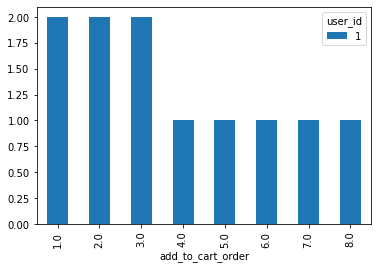

In [0]:
myresults.plot(kind='bar');

In [0]:
#using crosstab function  to builds a cross-tabulation plot showing the 
#frequency with whichdays since prior order and user_id data appear.


myresults = pd.crosstab(user1['days_since_prior_order'],user1['user_id'])

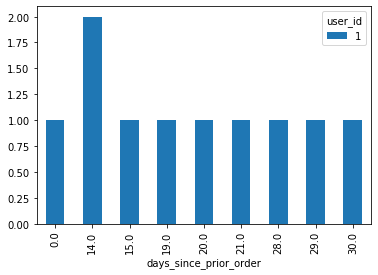

In [0]:
myresults.plot(kind='bar')

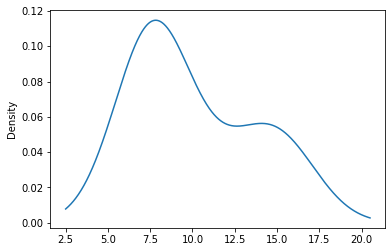

In [0]:
# density plot 
user1['order_hour_of_day'].plot.density();

In [0]:
# creating another dataset
condition = (userdf2['user_id']<=3)
newdf = userdf2[condition]

In [0]:
newdf.head()

,user_id,product_name,reordered,add_to_cart_order,order_hour_of_day,days_since_prior_order
0,1,Bulgarian Yogurt,1.0,1.0,8,NaN
8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,1.0,2.0,7,15.0
152,1,Organic Celery Hearts,0.0,3.0,12,21.0
1214,1,Cucumber Kirby,0.0,4.0,7,29.0
3627,1,Lightly Smoked Sardines in Olive Oil,1.0,5.0,15,28.0


In [0]:
newdf[['user_id','product_name']]

,user_id,product_name
0,1,Bulgarian Yogurt
8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese
152,1,Organic Celery Hearts
1214,1,Cucumber Kirby
3627,1,Lightly Smoked Sardines in Olive Oil
3651,1,Bag of Organic Bananas
3652,3,Bag of Organic Bananas
19131,1,Organic Hass Avocado
26424,1,Organic Whole String Cheese
28417,1,Grated Pecorino Romano Cheese


In [0]:
# crosstab product name days since proior order



pd.crosstab(user1['product_name'], user1['days_since_prior_order'])

days_since_prior_order,0.0,14.0,15.0,19.0,20.0,21.0,28.0,29.0,30.0
product_name,,,,,,,,,
Bag of Organic Bananas,0,0,0,1,0,0,0,0,0
Cucumber Kirby,0,0,0,0,0,0,0,1,0
Grated Pecorino Romano Cheese,1,0,0,0,0,0,0,0,0
Lightly Smoked Sardines in Olive Oil,0,0,0,0,0,0,1,0,0
Organic 4% Milk Fat Whole Milk Cottage Cheese,0,0,1,0,0,0,0,0,0
Organic Celery Hearts,0,0,0,0,0,1,0,0,0
Organic Half & Half,0,1,0,0,0,0,0,0,0
Organic Hass Avocado,0,0,0,0,1,0,0,0,0
Organic Whole String Cheese,0,1,0,0,0,0,0,0,0


In [0]:
# crosstab productname and reordered
pd.crosstab(user1['product_name'], user1['reordered'])

reordered,0.0,1.0
product_name,,
Bag of Organic Bananas,1,0
Bulgarian Yogurt,0,1
Cucumber Kirby,1,0
Grated Pecorino Romano Cheese,1,0
Lightly Smoked Sardines in Olive Oil,0,1
Organic 4% Milk Fat Whole Milk Cottage Cheese,0,1
Organic Celery Hearts,1,0
Organic Half & Half,1,0
Organic Hass Avocado,1,0


In [0]:
pd.crosstab(user1['product_name'], user1['order_hour_of_day'])

order_hour_of_day,7,8,9,12,14,15,16
product_name,,,,,,,
Bag of Organic Bananas,1,0,0,0,0,0,0
Bulgarian Yogurt,0,1,0,0,0,0,0
Cucumber Kirby,1,0,0,0,0,0,0
Grated Pecorino Romano Cheese,0,0,0,0,0,0,1
Lightly Smoked Sardines in Olive Oil,0,0,0,0,0,1,0
Organic 4% Milk Fat Whole Milk Cottage Cheese,1,0,0,0,0,0,0
Organic Celery Hearts,0,0,0,1,0,0,0
Organic Half & Half,0,1,0,0,0,0,0
Organic Hass Avocado,0,0,1,0,0,0,0


In [0]:
# with the above 3 crosstabs we can see what all products User1 buys, reorders, how long after the user reorders and at what time!!!
